# Question 1 
Introduction: 
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials. 
Occupations 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called users 
Step 4. Discover what is the mean age per occupation 
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages 
Step 7. For each combination of occupation and sex, calculate the mean age 
Step 8. For each occupation present the percentage of women and men 

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')


mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean Age per Occupation:")
print(mean_age_per_occupation)


male_ratio_per_occupation = (
    users[users['gender'] == 'M']
    .groupby('occupation')['gender']
    .count() / users.groupby('occupation')['gender'].count()
).sort_values(ascending=False)
print("\nMale Ratio per Occupation:")
print(male_ratio_per_occupation)


min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMin and Max Age per Occupation:")
print(min_max_age_per_occupation)

mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age per Occupation and Gender:")
print(mean_age_per_occupation_gender)


gender_percentage_per_occupation = (
    users.groupby(['occupation', 'gender'])['gender']
    .count()
    .unstack(fill_value=0)
    .apply(lambda x: (x / x.sum()) * 100, axis=1)
)
print("\nGender Percentage per Occupation:")
print(gender_percentage_per_occupation)

mean_age_per_occupation.to_csv('mean_age_per_occupation.csv', index=True)
male_ratio_per_occupation.to_csv('male_ratio_per_occupation.csv', index=True)
min_max_age_per_occupation.to_csv('min_max_age_per_occupation.csv', index=True)
mean_age_per_occupation_gender.to_csv('mean_age_per_occupation_gender.csv', index=True)
gender_percentage_per_occupation.to_csv('gender_percentage_per_occupation.csv', index=True)



Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation:
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.

# Question 2 
Euro Teams 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address 
Step 3. Assign it to a variable called euro12 
Step 4. Select only the Goal column 
Step 5. How many team participated in the Euro2012? 
Step 6. What is the number of columns in the dataset? 
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline 
Step 8. Sort the teams by Red Cards, then to Yellow Cards 
Step 9. Calculate the mean Yellow Cards given per Team  
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
with G 
Step 12. Select the first 7 columns 
Step 13. Select all columns except the last 3 
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [15]:
import pandas as pd


url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)


goals = euro12['Goals']
print("\nGoals:")
print(goals)
num_teams = euro12['Team'].nunique()
print(f"\nNumber of teams in Euro 2012: {num_teams}")


num_columns = euro12.shape[1]
print(f"\nNumber of columns in the dataset: {num_columns}")


discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline Data:")
print(discipline)

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nSorted Discipline:")
print(discipline_sorted)

mean_yellow_cards = discipline['Yellow Cards'].mean()
print(f"\nMean Yellow Cards per Team: {mean_yellow_cards:.2f}")

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams Scored More than 6 Goals:")
print(teams_more_than_6_goals)

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams Starting with G:")
print(teams_starting_with_G)

first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 Columns:")
print(first_7_columns)

all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll Except Last 3 Columns:")
print(all_except_last_3)

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy of Selected Teams:")
print(shooting_accuracy)



Goals:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams in Euro 2012: 16

Number of columns in the dataset: 35

Discipline Data:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11         

# Question 3 
Housing 
Step 1. Import the necessary libraries 
Step 2. Create 3 differents Series, each of length 100, as follows: 
• The first a random number from 1 to 4 
• The second a random number from 1 to 3 
• The third a random number from 10,000 to 30,000 
Step 3. Create a DataFrame by joinning the Series by column 
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter 
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn' 
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [ ]:
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
np.random.seed(42)  # For reproducibility
series1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10,000 to 30,000

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the column names
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Display the DataFrame
print("\nHousing DataFrame:")
print(df)

# Step 5: Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')

# Step 6: Check if it goes only until index 99
last_index = bigcolumn.index.max()
print(f"\nLast index before reindexing: {last_index}")

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300)).reset_index(drop=True)
print("\nBigColumn DataFrame reindexed to 0-299:")
print(bigcolumn)


In [23]:
import pandas as pd
import numpy as np

np.random.seed(42)  
series1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10,000 to 30,000

df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

print("\nHousing DataFrame:")
print(df)

bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')

last_index = bigcolumn.index.max()
print(f"\nLast index before reindexing: {last_index}")

bigcolumn = bigcolumn.reindex(range(300)).reset_index(drop=True)
print("\nBigColumn DataFrame reindexed to 0-299:")
print(bigcolumn)



Housing DataFrame:
    bedrs  bathrs  price_sqr_meter
0       3       3            23931
1       4       2            13627
2       1       2            26157
3       3       2            20173
4       3       2            28047
..    ...     ...              ...
95      2       1            11154
96      2       2            14499
97      4       1            16295
98      2       1            22183
99      1       2            22874

[100 rows x 3 columns]

Last index before reindexing: 299

BigColumn DataFrame reindexed to 0-299:
     bigcolumn
0            3
1            4
2            1
3            3
4            3
..         ...
295      11154
296      14499
297      16295
298      22183
299      22874

[300 rows x 1 columns]


# Question 4 
Wind Statistics  
The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question. 
 
You should be able to perform all of these operations without using a for loop or 
other looping construct. 
 
The data in 'wind.data' has the following format: 
 
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   
MAL 
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04 
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83 
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71 
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day. 
 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from the attached file wind.txt 
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index. 
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it. 
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns]. 
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below. 
Step 7. Compute how many non-missing values there are in total. 
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times. 
A single number for the entire dataset. 
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days 
A different set of numbers for each location. 
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day. 
A different set of numbers for each day. 
Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January. 
Step 12. Downsample the record to a yearly frequency for each location. 
Step 13. Downsample the record to a monthly frequency for each location. 
Step 14. Downsample the record to a weekly frequency for each location. 
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [35]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/Sonu John/Downloads/Dataset3/wind.txt' 
data = pd.read_csv(file_path, sep=r'\s+')

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data.set_index('Date', inplace=True)

def correct_year(date):
    return date.replace(year=date.year - 100) if date.year > 2000 else date

data.index = data.index.map(correct_year)

assert data.index.dtype == 'datetime64[ns]'

missing_values = data.isnull().sum()

non_missing_total = data.notnull().sum().sum()

overall_mean_windspeed = data.mean().mean()

loc_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]

day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

january_data = data[data.index.month == 1]
january_avg_windspeed = january_data.groupby(january_data.index.month).mean()

yearly_data = data.resample('YE').mean()

monthly_data = data.resample('ME').mean()

weekly_data = data.resample('W').mean()

weekly_stats = weekly_data.aggregate(['min', 'max', 'mean', 'std']).iloc[:52]

print("\nMissing Values by Location:")
print(missing_values)

print("\nTotal Non-Missing Values:")
print(non_missing_total)

print("\nOverall Mean Windspeed:")
print(overall_mean_windspeed)

print("\nLocation Statistics:")
print(loc_stats)

print("\nDaily Statistics:")
print(day_stats)

print("\nJanuary Average Windspeed:")
print(january_avg_windspeed)

print("\nYearly Data:")
print(yearly_data)

print("\nMonthly Data:")
print(monthly_data)

print("\nWeekly Data:")
print(weekly_data)

print("\nWeekly Statistics for First 52 Weeks:")
print(weekly_stats)



Missing Values by Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Non-Missing Values:
78857

Overall Mean Windspeed:
10.227982360836938

Location Statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily Statistics:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1

# Question 5 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called chipo. 
Step 4. See the first 10 entries 
Step 5. What is the number of observations in the dataset? 
Step 6. What is the number of columns in the dataset? 
Step 7. Print the name of all the columns. 
Step 8. How is the dataset indexed? 
Step 9. Which was the most-ordered item? 
Step 10. For the most-ordered item, how many items were ordered? 
Step 11. What was the most ordered item in the choice_description column? 
Step 12. How many items were orderd in total? 
Step 13. 
• Turn the item price into a float 
• Check the item price type 
• Create a lambda function and change the type of item price 
• Check the item price type 
Step 14. How much was the revenue for the period in the dataset? 
Step 15. How many orders were made in the period? 
Step 16. What is the average revenue amount per order? 
Step 17. How many different items are sold? 

In [37]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')


first_10_entries = chipo.head(10)

num_observations = chipo.shape[0]

num_columns = chipo.shape[1]

columns_names = chipo.columns.tolist()

dataset_index = chipo.index

most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()

most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()

most_ordered_choice = chipo['choice_description'].value_counts().idxmax()

total_items_ordered = chipo['quantity'].sum()

chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

total_revenue = (chipo['item_price'] * chipo['quantity']).sum()

total_orders = chipo['order_id'].nunique()

average_revenue_per_order = total_revenue / total_orders

different_items_sold = chipo['item_name'].nunique()

print("First 10 Entries:")
print(first_10_entries)
print(f"\nNumber of observations: {num_observations}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {columns_names}")
print(f"Dataset index: {dataset_index}")
print(f"Most-ordered item: {most_ordered_item}")
print(f"Quantity of the most-ordered item: {most_ordered_quantity}")
print(f"Most-ordered choice description: {most_ordered_choice}")
print(f"Total items ordered: {total_items_ordered}")
print(f"Total revenue: ${total_revenue:.2f}")
print(f"Total orders: {total_orders}")
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")
print(f"Number of different items sold: {different_items_sold}")


First 10 Entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

# Question 6 
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes! 

Matplotlib is building the font cache; this may take a moment.


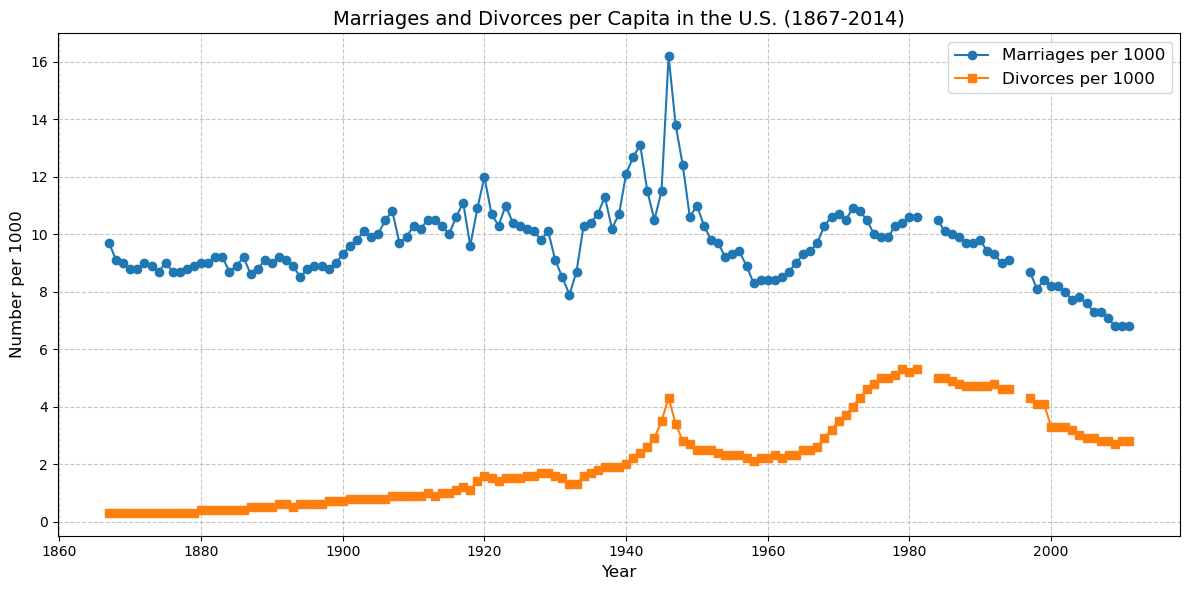

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/Sonu John/Downloads/Dataset3/us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='s')

plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number per 1000', fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# For showing the plot
plt.show()


# Question 7 
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000. 
Don't forget to label your axes!

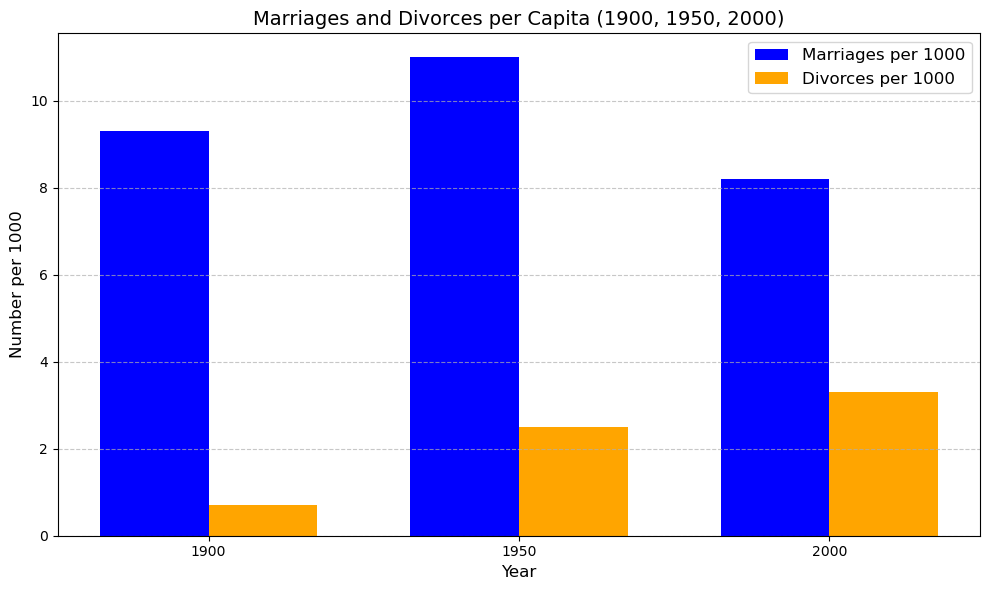

In [41]:

file_path_new = 'C:/Users/Sonu John/Downloads/Dataset3/us-marriages-divorces-1867-2014.csv'
data_new = pd.read_csv(file_path_new)

filtered_data_new = data_new[data_new['Year'].isin([1900, 1950, 2000])]
#Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(filtered_data_new))

ax.bar(index, filtered_data_new['Marriages_per_1000'], bar_width, label='Marriages per 1000', color='blue')
ax.bar([i + bar_width for i in index], filtered_data_new['Divorces_per_1000'], bar_width, label='Divorces per 1000', color='orange')

ax.set_title('Marriages and Divorces per Capita (1900, 1950, 2000)', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number per 1000', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(filtered_data_new['Year'])
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# For showing the plot
plt.tight_layout()
plt.show()


# Question 8 
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes! 

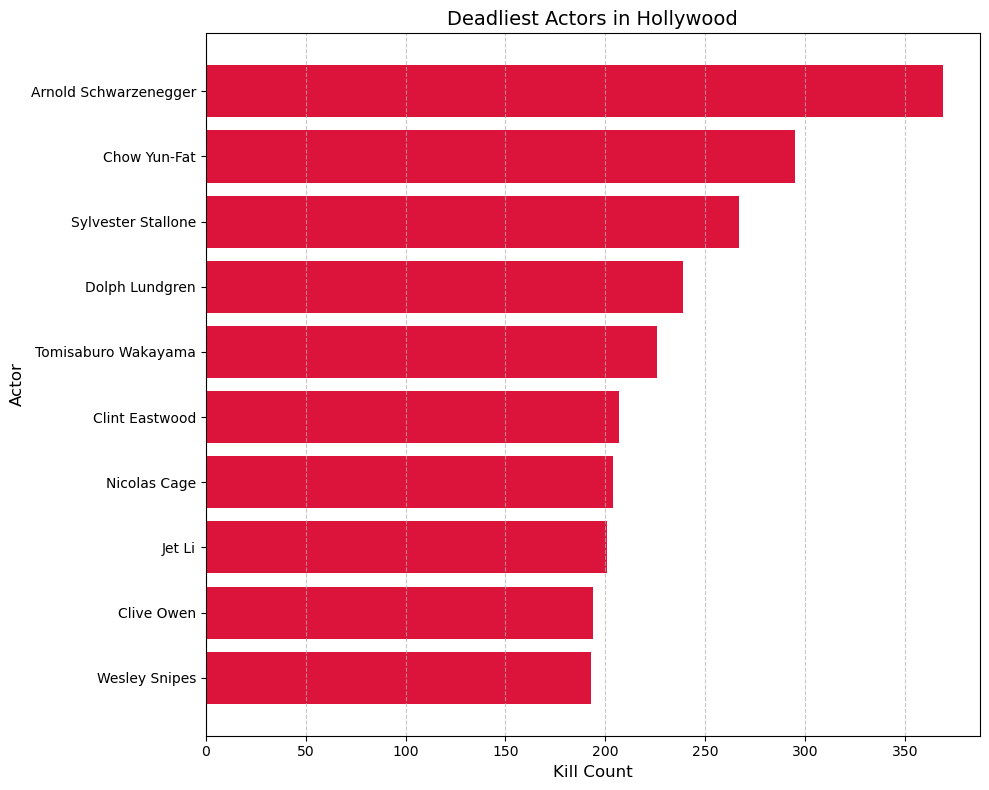

In [45]:
file_path_actors = 'C:/Users/Sonu John/Downloads/Dataset3/actor_kill_counts.csv'
actor_data = pd.read_csv(file_path_actors)

actor_data_sorted = actor_data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(actor_data_sorted['Actor'], actor_data_sorted['Count'], color='crimson')

plt.title('Deadliest Actors in Hollywood', fontsize=14)
plt.xlabel('Kill Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


# Question 9 
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated. 
 
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

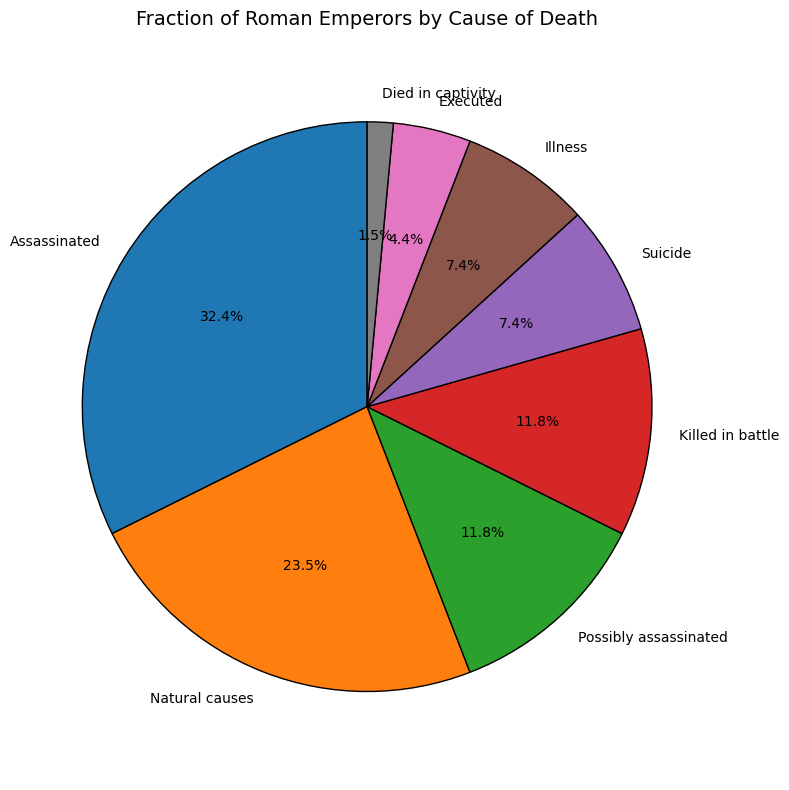

In [54]:
file_path_emperors = 'C:/Users/Sonu John/Downloads/Dataset3/roman-emperor-reigns.csv'
emperors_data = pd.read_csv(file_path_emperors)

assassination_counts = emperors_data['Cause_of_Death'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    assassination_counts,
    labels=assassination_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Fraction of Roman Emperors by Cause of Death', fontsize=14)

plt.axis('equal')

plt.tight_layout()
plt.show()


# Question 10 
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009. 
 
Don't forget to label your axes! 
 
Color each dot according to its year. 

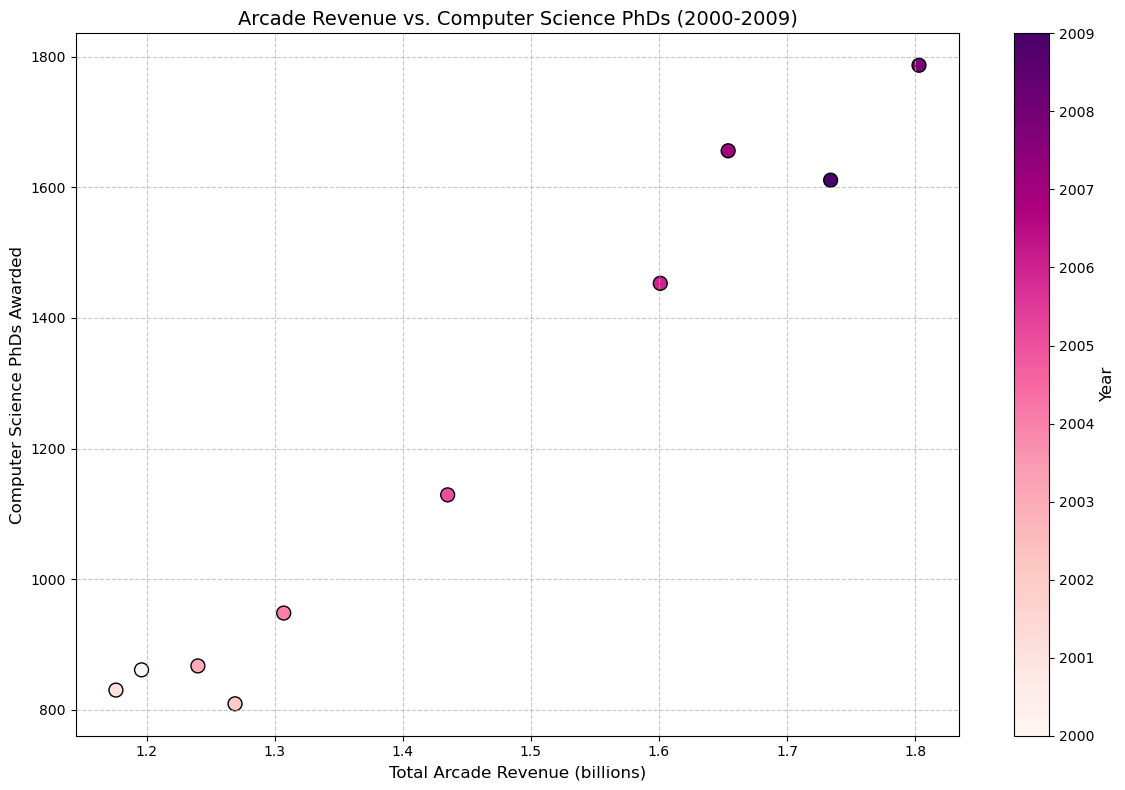

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_scatter = 'C:/Users/Sonu John/Downloads/Dataset3/arcade-revenue-vs-cs-doctorates.csv'
scatter_data = pd.read_csv(file_path_scatter)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    scatter_data['Total Arcade Revenue (billions)'],
    scatter_data['Computer Science Doctorates Awarded (US)'],
    c=scatter_data['Year'],
    cmap='RdPu',  # Violet to red gradient
    edgecolor='k',
    s=100  # Size of the dots
)

cbar = plt.colorbar(scatter)
cbar.set_label('Year', fontsize=12)

plt.title('Arcade Revenue vs. Computer Science PhDs (2000-2009)', fontsize=14)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science PhDs Awarded', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
